In [138]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [1]:
!ls

EDA.ipynb
Project3Template.ipynb
data


In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("data/training_set_values.csv")

In [4]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
test_df = pd.read_csv("data/test_set_values.csv")
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
#Both of our datasets have matching columns (40 each)

In [7]:
train_df.head(20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [10]:
#check for duplicates
train_df["num_private"].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [14]:
#we can drop duplicate columns after verifying they are identical
train_df.loc[train_df["quantity"] != train_df["quantity_group"]]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


We can safely drop one of the two quantity columns.

In [41]:
train_df.loc[train_df["waterpoint_type"] != train_df["waterpoint_type_group"]]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.000000,-2.000000e-08,Polisi,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
55,68724,20.0,2013-02-22,Muwsa,766,MUWSA,37.348169,-3.356538e+00,Environment,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,29915,600.0,2013-01-28,Isf,834,DWE,29.749577,-4.899134e+00,Shule Ya Msingi Muhamani,0,...,unknown,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe
59345,68576,600.0,2013-01-25,Isf,962,DWE,29.729909,-4.801508e+00,Tupendane,0,...,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe
59349,54026,0.0,2012-10-07,Dwsp,0,DWE,32.242568,-4.189353e+00,Kwa Mzee John Magube,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe
59356,34109,50.0,2013-02-05,Tasaf,-18,TASAF,40.218467,-1.033078e+01,Kwa Mzee Licholonjo,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [42]:
train_df["waterpoint_type"].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [43]:
train_df["waterpoint_type_group"].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

Waterpoint_type and waterpoint_type_group have basically the same values, but one of the columns splits communal standpipe into single vs. multiple. We only need to keep one of these.

In [15]:
train_df.loc[train_df["source"] != train_df["source_type"]]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
10,49056,0.0,2011-02-20,Private,62,Private,39.209518,-7.034139,Mzee Hokororo,0,...,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,other,other
15,61848,0.0,2011-08-04,Rudep,1645,DWE,31.444121,-8.274962,Kwa Juvenal Ching'Ombe,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe


In [16]:
train_df["source"].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [17]:
train_df["source_type"].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [21]:
train_df.loc[(train_df["source_type"] == "borehole") & (train_df["source"] == "machine dbh")]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
10,49056,0.0,2011-02-20,Private,62,Private,39.209518,-7.034139,Mzee Hokororo,0,...,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,other,other
15,61848,0.0,2011-08-04,Rudep,1645,DWE,31.444121,-8.274962,Kwa Juvenal Ching'Ombe,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59387,26640,100.0,2013-03-12,0,25,0,39.176480,-6.957098,Kwa Maliba,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59389,30410,0.0,2011-08-06,Co,783,DWE,30.646486,-7.365418,Sekondari,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


In [22]:
train_df.loc[(train_df["source_type"] == "borehole") | (train_df["source"] == "machine dbh")]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
10,49056,0.0,2011-02-20,Private,62,Private,39.209518,-7.034139,Mzee Hokororo,0,...,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,other,other
15,61848,0.0,2011-08-04,Rudep,1645,DWE,31.444121,-8.274962,Kwa Juvenal Ching'Ombe,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59387,26640,100.0,2013-03-12,0,25,0,39.176480,-6.957098,Kwa Maliba,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59389,30410,0.0,2011-08-06,Co,783,DWE,30.646486,-7.365418,Sekondari,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


In [24]:
train_df.loc[(train_df["source_type"] == "borehole") & (train_df["source"] != "machine dbh")]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
66,34255,0.0,2011-02-22,Piusi,1788,SHIPO,34.897257,-9.203522,Kwa Piusi,0,...,never pay,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
107,60371,0.0,2011-07-21,Hesawa,0,HESAWA,31.767301,-3.025106,Maendeleo,0,...,other,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
147,66521,2000.0,2011-02-03,Shipo,1603,Shipo,34.988871,-8.911325,none,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
160,13815,1000.0,2011-03-03,Kkkt,1562,Villagers,34.945465,-8.868660,Kwa Robart Mchena,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
202,8060,500.0,2011-02-22,Shipo,1768,SHIPO,34.899308,-9.204511,Kwa Bonifasi Pascal,0,...,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58959,3894,0.0,2011-08-12,Rudep,811,DWE,31.552397,-7.666432,Kwa Charles,0,...,never pay,soft,good,enough,enough,hand dtw,borehole,groundwater,other,other
58981,41505,1000.0,2011-02-22,Danida,1881,DWE,35.497390,-8.346554,none,0,...,annually,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
59191,42641,500.0,2011-09-03,Kkkt,1598,Villagers,34.896096,-8.902061,Kwa Feda Mbago,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
59283,55727,0.0,2011-03-14,Danida,1905,DWE,35.136409,-8.370713,none,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump


The source table is nearly identical to the source_type table, but "source" is more descriptive, as it breaks out the two different types of boreholes. We will drop source_type and keep "source" in our dataframe.

In [25]:
train_df.loc[train_df["payment"] != train_df["payment_type"]]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
11,50409,200.0,2013-02-18,Danida,1062,DANIDA,35.770258,-10.574175,Kwa Alid Nchimbi,0,...,on failure,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
13,50495,0.0,2013-03-15,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [31]:
X_train.shape

(44550, 40)

In [32]:
X_test.shape

(14850, 40)

In [37]:
y_test.value_counts()

functional                 8098
non functional             5678
functional needs repair    1074
Name: status_group, dtype: int64

In [38]:
X_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### Data Preparation

In [44]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [46]:
#drop these columns - duplicates, and num_private doesn't tell us anything helpful
initial_drop = ["quantity_group", "source_type", "num_private", "waterpoint_type"]
train_df = train_df.drop(initial_drop, axis=1)

In [47]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,vwc,user-group,pay annually,annually,soft,good,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,wug,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,vwc,user-group,pay per bucket,per bucket,soft,good,enough,dam,surface,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,vwc,user-group,never pay,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,other,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe


- step 1: train_test_split the data
- step 2: pipeline preprocessing

In [48]:
functioning = pd.read_csv('data/training_set_labels.csv')
functioning.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [67]:
functioning["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [74]:
#convert status_group to binary numeric column
functional_convert = {"functional": 1, "non functional": 0, "functional needs repair": 0}
functioning["status_group"] = functioning["status_group"].replace(functional_convert)

In [75]:
functioning["status_group"]

0        1
1        1
2        1
3        0
4        1
        ..
59395    1
59396    1
59397    1
59398    1
59399    1
Name: status_group, Length: 59400, dtype: int64

In [76]:
X = train_df
y = functioning["status_group"]

In [ ]:
#Eliminate the categorical columns for this initial workflow

In [77]:
numeric_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']
numeric_df = train_df[numeric_columns]
y = functioning["status_group"]

In [78]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(numeric_df, y, random_state=42)

In [79]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [80]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.54231201, 0.54231201, 0.54231201, 0.54231201, 0.54242424])

Based on our dummy model assuming that all predictions will result in the majority class, we can see the dispersion of results - a little more than half of our waterwells are functioning.

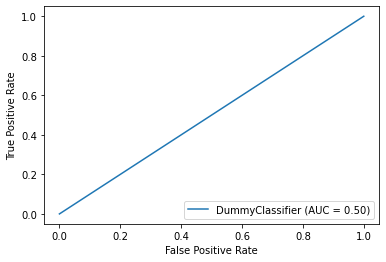

In [91]:
plot_roc_curve(dummy_model,X_train,y_train)

50% - not great results.

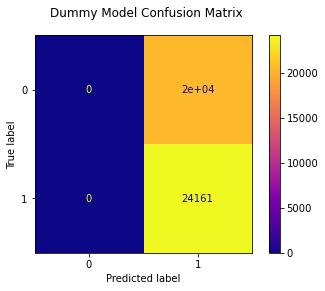

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

fig.suptitle("Dummy Model Confusion Matrix")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

We need to prioritize accuracy and precision because of our business problem.

In [109]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
#acc = (tp + tn) / (tp + tn + fp + fn)
baseline_acc = (24161+0)/(24161+20000)
#prec = tp / (tp + fp)
baseline_prec = 24161/(24161+20000)

baseline_acc
baseline_prec

0.5471117048979869

Since we combined our non-functional and functional needs repair targets, our target data is already pretty balanced. We will need to strengthen our model validation in order to determine what is a real prediction, and what is a result of random chance. 

In [85]:
logreg = LogisticRegression(random_state=42, penalty='none')

In [86]:
logreg.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=42)

In [87]:
logreg.predict(X_train)[:50]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1], dtype=int64)

Okay, we have confirmed that our first simple logistic regression model (using numeric columns only) is predicting a mixture of our binary target variables. 

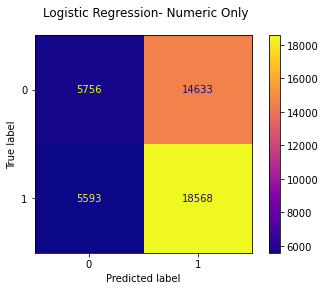

In [89]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression- Numeric Only")

plot_confusion_matrix(logreg, X_train, y_train, ax=ax, cmap="plasma");

In [93]:
tp = 18568
tn = 5756
fp = 14633
fn = 5593

acc = (tp + tn) / (tp+tn+fp+fn)
acc

0.545993265993266

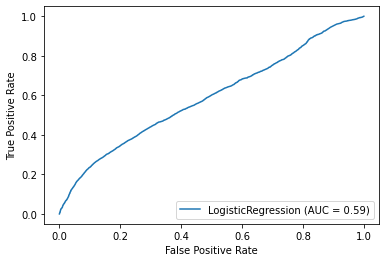

In [90]:
plot_roc_curve(logreg,X_train,y_train)

False positive rate for our numeric column simple logistic regression model is certainly better than our dummy model, but still not great. Our model is certainly underfitting in this instance, we will need to perform more data preparation to include more of our categorical variables.

In [103]:
std_scaler = StandardScaler()

logreg_scaled = LogisticRegression(random_state=42, penalty='none')

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

logreg_scaled.fit(X_train_scaled, y_train)


LogisticRegression(penalty='none', random_state=42)

In [110]:

scaled_preds = logreg_scaled.predict(X_test_scaled)
model_accuracy = accuracy_score(y_test, scaled_preds)
model_precision = precision_score(y_test, scaled_preds)


In [111]:
#compare accuracy and precision scoring: scaled model vs baseline
baseline_acc
baseline_prec

print(f"""
Accuracy
Baseline: {baseline_acc:1.3f} Fitted Model: {model_accuracy:1.3f}

Precision
Baseline: {baseline_prec:1.3f} Fitted Model: {model_precision:1.3f}
""")


Accuracy
Baseline: 0.547 Fitted Model: 0.549

Precision
Baseline: 0.547 Fitted Model: 0.563



In [121]:
conda install -c conda-forge category_encoders

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\saman\anaconda3\envs\learn-env

  added / updated specs:
    - category_encoders


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge
    category_encoders-2.3.0    |     pyhd8ed1ab_0          57 KB  conda-forge
    certifi-2021.10.8          |   py38haa244fe_0         145 KB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.1 MB

The following NEW packages will be INSTALLED:

  category_encoders  conda-forge/noarch::category_encoders-2.3.0-pyhd8ed1ab_0

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2021.9.30-~ --> conda



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




So our accuracy and precision scores for our numeric data only barely perform better than our baseline.
We need to certainly bring in our categorical columns at this point.

In [112]:
#Eliminating numeric columns did not work out... lets create a new train test split to work with our categorical columns too

In [148]:
X = train_df
y = functioning["status_group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [144]:
# Set up lists for columns requiring different treatment
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 3:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [150]:
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#create preprocessing pipelines for full data

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])
freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols),
        ('scaler', num_transformer, num_cols)
    ])

preprocessor.fit(X_train)


ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['public_meeting', 'recorded_by', 'permit']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer...
                                  'extraction_type_class', 'man

In [152]:
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver="saga"))
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

{'fit_time': array([6.23963785, 5.2977953 , 5.56479287, 5.35382509, 5.3258934 ]),
 'score_time': array([0.41889811, 0.46976376, 0.47413945, 0.40835595, 0.4748466 ]),
 'test_score': array([0.67160494, 0.66083053, 0.65578002, 0.6640853 , 0.65813692]),
 'train_score': array([0.67435466, 0.67362514, 0.67544893, 0.67542088, 0.67558923])}

In [156]:
#project note
#knn model took like an hour... but had high accuracy... realistically probably not the best deliverable